In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [2]:
# linear data
X = np.array([1,5,1.5,8,1,9,7,8.7,2.3,5.5,7.7,6.1])
Y = np.array([2,8,1.8,8,0.6,11,10,9.4,4,3,8.8,7.5])

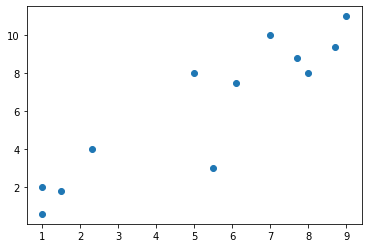

In [3]:
# show unclassified data
plt.scatter(X, Y)
plt.show()

In [4]:
# shaping the data for training the model
training_x = np.vstack((X, Y)).T
training_y = [0,1,0,1,0,1,1,1,0,0,1,1]

In [5]:
# define the model
clf = svm.SVC(kernel = "linear", C = 1.0)

In [6]:
# train the data
clf.fit(training_x, training_y)

SVC(kernel='linear')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


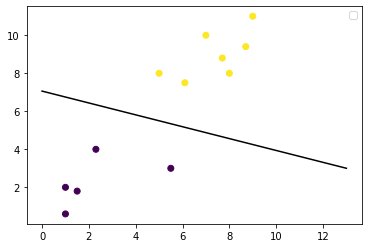

In [7]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x - axis space for the data points
xx = np.linspace(0,13)

# get the y-values to plot the decision boundary
yy = a * xx - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(xx, yy, 'k-')

# show the plot visually
plt.scatter(training_x[:,0], training_x[:,1], c=training_y)
plt.legend()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [9]:
# non - linear data
circle_x, circle_y = datasets.make_circles(n_samples=300,noise=0.05)

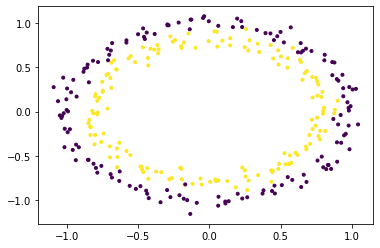

In [10]:
# show raw non-linear data
plt.scatter(circle_x[:,0], circle_x[:,1],c=circle_y,marker='.')
plt.show()

In [11]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf',C=1.0)

In [12]:
# training non-linear model
nonlinear_clf.fit(circle_x,circle_y)

SVC()

In [13]:
# plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    
    # shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T

    # get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary
    ax.contour(X,Y,P,
               levels=[0],alpha=0.5,
               linestyles=['-'])

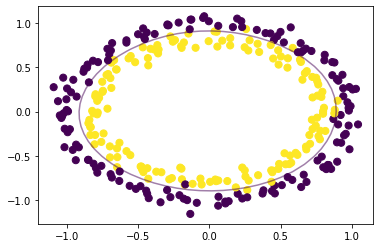

In [14]:
# plot data and decision boundary
plt.scatter(circle_x[:,0], circle_x[:,1],c=circle_y,s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:,0], nonlinear_clf.support_vectors_[:,1],s=50,lw=1,facecolors='none')
plt.show()

In [15]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C = 1, random_state=42)
score=cross_val_score(clf, training_x,training_y, cv=10)
print("avg accuracy:\t{0:, .4f)".format(np.mean(score)))
print("avg std:\t{0:,.4f}".format(np.std(score)))

ValueError: ValueError: n_splits=10 cannot be greater than the number of members in each class.